# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

             So in this problem,We have to predict  Telecom Customer Churn on the basis of Total charges,Because.Customers who are more likely to drop any  Telecom service provider,they use their minimum services or for the short duration or use only prepaid services.So here 'Target Column' is TotalCharges.Since this column has continuous data,So it is a Regression problem. 



In [128]:
## Importing necessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
## Checking columns:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns.

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
## Categorical column
customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn

## Numerical column
SeniorCitizen,tenure,MonthlyCharges

In [8]:
## Checking unique values:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
##Separating Categorical columns:-
cat_cols=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_cols.append(i)
print(cat_cols)        

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [15]:
## Value Counts:
for i in cat_cols:
    print(f"{i}\n")
    print(df[i].value_counts())
    print("--------------------")

customerID

8734-DKSTZ    1
5338-YHWYT    1
8883-ANODQ    1
8434-PNQZX    1
4329-YPDDQ    1
             ..
2429-AYKKO    1
3537-RYBHH    1
3841-NFECX    1
4707-YNOQA    1
6257-RJOHI    1
Name: customerID, Length: 7043, dtype: int64
--------------------
gender

Male      3555
Female    3488
Name: gender, dtype: int64
--------------------
Partner

No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------
Dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------
PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------
MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------
InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------
OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurit

In [17]:
## Checking target column value counts:
df['TotalCharges'].value_counts()

20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
2274.9     1
202.15     1
902        1
707.5      1
4964.7     1
Name: TotalCharges, Length: 6531, dtype: int64

customerID has 7043 unique values.
gender has 2 values  Male and Female.
SeniorCitizen has 2 values 0 and 1.
Partner,Dependents,PhoneService,Churn,PaperlessBilling columns have 2 values,Yes or No.
MultipleLines has 3 values No,Yes,and No Phone Service.
InternetService has 3 values Fiber optic,DSL and No.
OnlineSecurity , OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies have 3 values No,yes,and No internet service.
Contract has 3 values :- Month-to-month,Two year and One Year.
PaymentMethod has 4 type of values:Electronic check,  Mailed check, Bank transfer (automatic) , Credit card (automatic)
**TotalCharges has  6531 values.As we can see from value_counts method,there are 11 values of blank space or white space.  

In [130]:
## Finding index of columns where blank spaces are present:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Above all 11 rows,TotalCharges has white spaces as value.So first fill it with nan values.

In [131]:
df['TotalCharges'] =df['TotalCharges'].replace(" ",np.nan)

In [24]:
## Again checking for null values:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges has now 11 null values.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

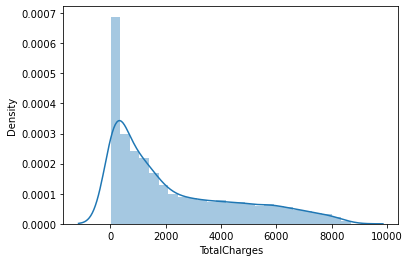

In [27]:
##Checking distribution of data in Total Charges:
sns.distplot(df['TotalCharges'])    

**Since TotalCharges datatype is object,so will first convert it's data type to float.

In [132]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [30]:
df['TotalCharges'].dtype

dtype('float64')

Now it has changed and data is not very much skewed,so will replace null values with mean.

In [133]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is not any null value present in any column.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
## 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


tenure min values is 0 and max value is 72.
MonthlyCharges min value is 18.25 and max value is 118.75.
TotalCharges min value is 18.80 and max value is 8684.

# Visualization

<Figure size 1080x720 with 0 Axes>

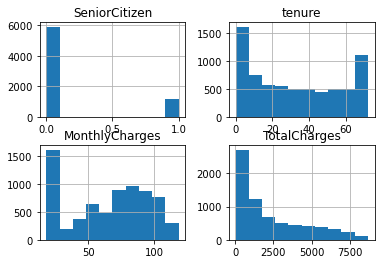

In [36]:
plt.figure(figsize=(15,10))
df.hist()
plt.show()

SeniorCitizen counts for  0 are much greater than 0.
Most customer's Tenure value is between  0-20 and then for 60-72.
Most customer's  Mothly charges value  is less than 20 and 70-100.
Most customer's Total Charges less than 1500.

# Univariate Analysis

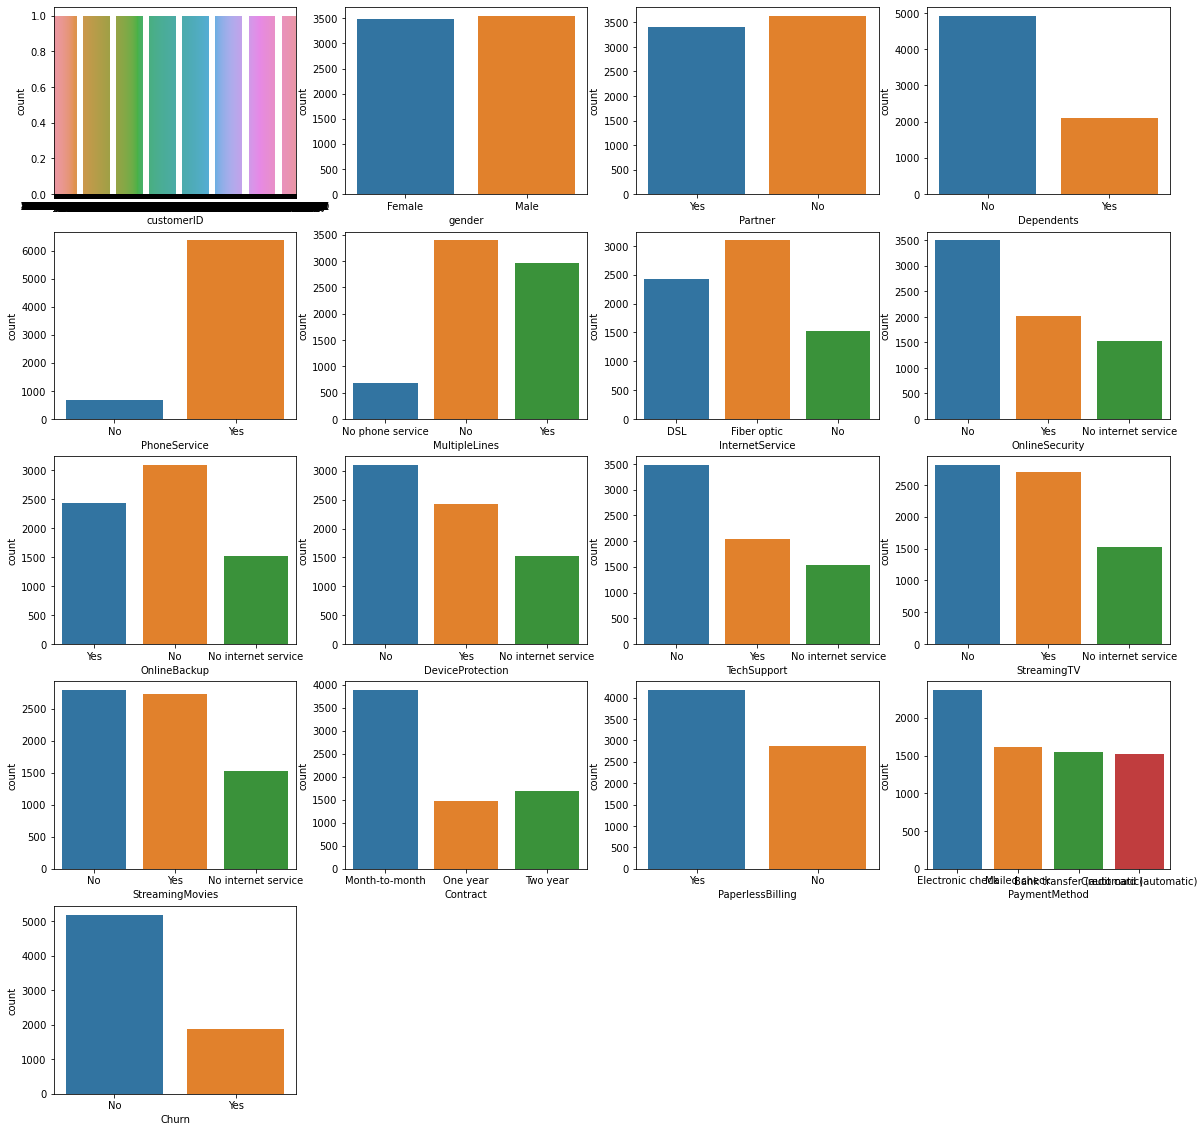

In [39]:
cat_col=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



plt.figure(figsize=(20,20))
graph =1
for i in cat_col:
    if graph <=18:
        ax = plt.subplot(5,4,graph)
        sns.countplot(df[i])
        plt.xlabel(i)
        plt.xtick(rotation=90)
        graph +=1
plt.show()    


gender and Partner column has almost equal counts for Male and Female.
Customers with No Dependants has more count.
Customers who are using PhoneService,No Multiple lines,Fiberoptic internet service are more in counts.
Customers who are using No OnlineSecurity,No OnlineBackup,No DeviceProtection,No TechSupport,No DeciceProtection are more in counts.
StreamingTV and StreamingMovies counts almost equal for Yes and No.
Customers who are using Month-to-month contract are more in counts.
Customers who use PaperlessBilling are more in counts.
Customers who do payment using Electronic Channel are more in counts.
Customers who want to leave current  Telecom service provider are less.


# Bi-Variate Analysis

<Figure size 720x432 with 0 Axes>

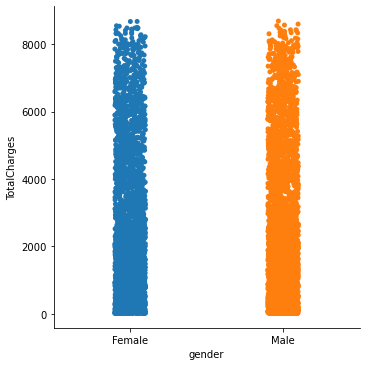

In [40]:
plt.figure(figsize=[10,6])
sns.catplot(x='gender',y='TotalCharges',data=df)


<Figure size 720x432 with 0 Axes>

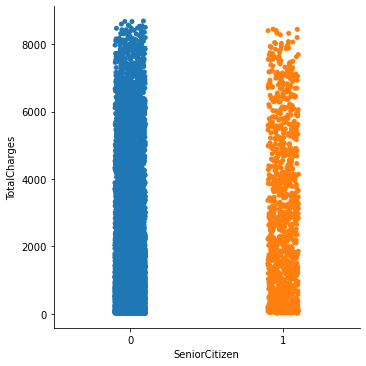

In [41]:
plt.figure(figsize=[10,6])
sns.catplot(x='SeniorCitizen',y='TotalCharges',data=df)


SeniorCitizen 0 means not a senior citizen Totalcharges are more. 

<Figure size 720x432 with 0 Axes>

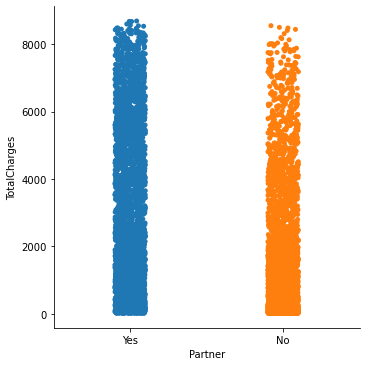

In [42]:
plt.figure(figsize=[10,6])
sns.catplot(x='Partner',y='TotalCharges',data=df)


Customers with Partners,their TotalCharges is more than no partners.

<Figure size 720x432 with 0 Axes>

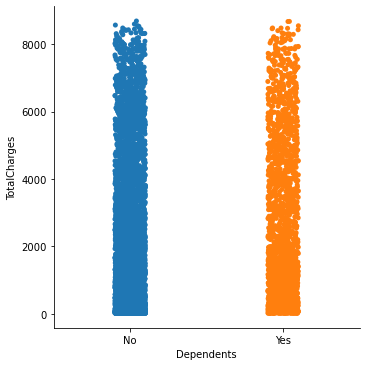

In [44]:
plt.figure(figsize=[10,6])
sns.catplot(x='Dependents',y='TotalCharges',data=df)


Customers with No dependents,their TotalCharges is more than with dependents.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

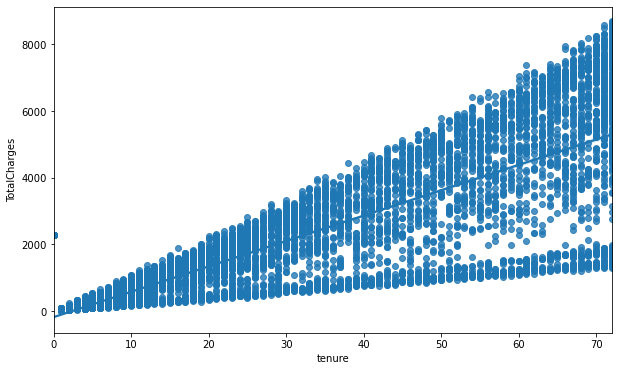

In [48]:
plt.figure(figsize=[10,6])
sns.regplot(x='tenure',y='TotalCharges',data=df)


So we can see that a  strong positive relationship between tenure and TotalCharges.

<Figure size 720x432 with 0 Axes>

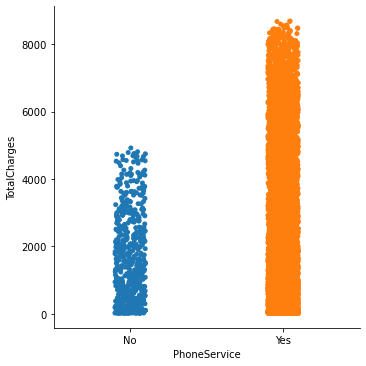

In [49]:
plt.figure(figsize=[10,6])
sns.catplot(x='PhoneService',y='TotalCharges',data=df)


Customers using PhoneService, TotalCharges is more.

<Figure size 720x432 with 0 Axes>

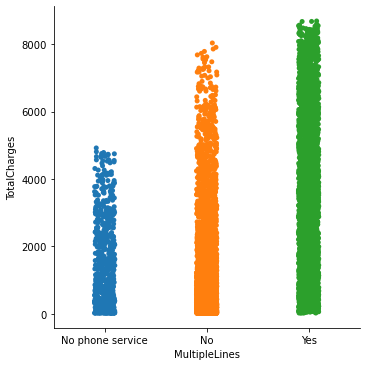

In [50]:
plt.figure(figsize=[10,6])
sns.catplot(x='MultipleLines',y='TotalCharges',data=df)


Customers using MultipleLines ,TotalCharges is more than others.

<Figure size 720x432 with 0 Axes>

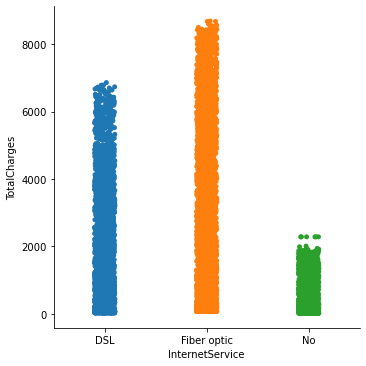

In [51]:
plt.figure(figsize=[10,6])
sns.catplot(x='InternetService',y='TotalCharges',data=df)


Customers using Fiber optic InternetService, TotalCharges is more than others.

<Figure size 720x432 with 0 Axes>

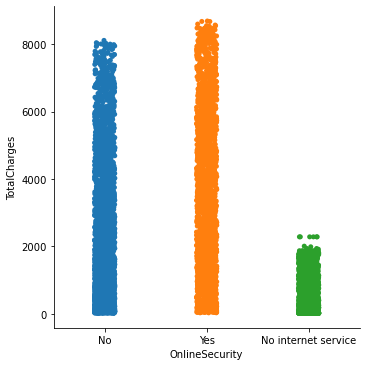

In [53]:
plt.figure(figsize=[10,6])
sns.catplot(x='OnlineSecurity',y='TotalCharges',data=df)


Customers using OnlineSecurity, TotalCharges is more than others.

<Figure size 720x432 with 0 Axes>

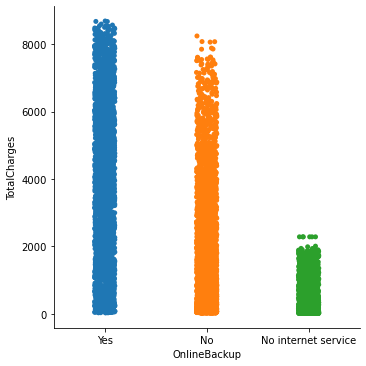

In [54]:
plt.figure(figsize=[10,6])
sns.catplot(x='OnlineBackup',y='TotalCharges',data=df)


Customers using OnlineBackup, TotalCharges is more for them than others.

<Figure size 720x432 with 0 Axes>

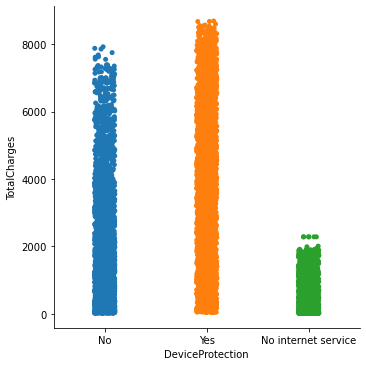

In [55]:
plt.figure(figsize=[10,6])
sns.catplot(x='DeviceProtection',y='TotalCharges',data=df)


In [ ]:
Customers using DeviceProtection, TotalCharges is more for them than others.

<Figure size 720x432 with 0 Axes>

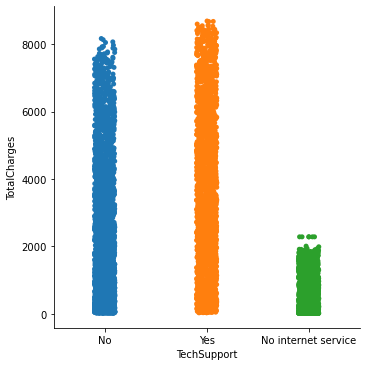

In [56]:
plt.figure(figsize=[10,6])
sns.catplot(x='TechSupport',y='TotalCharges',data=df)


Customers using or not using Techsupport, TotalCharges is almost same for them.

<Figure size 720x432 with 0 Axes>

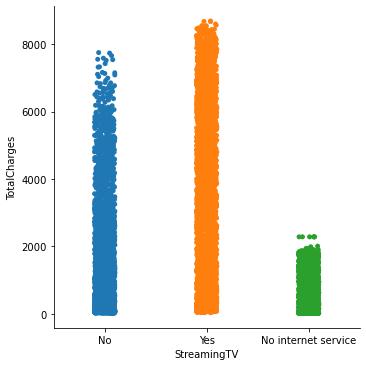

In [57]:
plt.figure(figsize=[10,6])
sns.catplot(x='StreamingTV',y='TotalCharges',data=df)


In [ ]:
Customers using or not using StreamingTV, TotalCharges is more for them.

<Figure size 720x432 with 0 Axes>

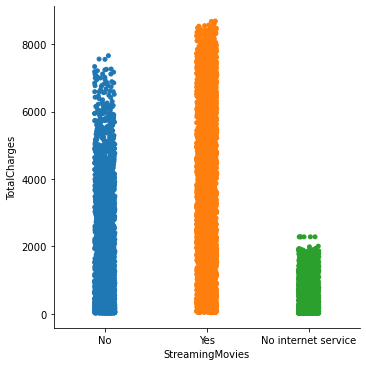

In [58]:
plt.figure(figsize=[10,6])
sns.catplot(x='StreamingMovies',y='TotalCharges',data=df)


In [ ]:
Customers using StreamingMovies, TotalCharges is more for them.

<Figure size 720x432 with 0 Axes>

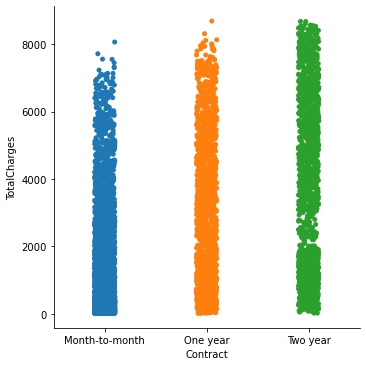

In [59]:
plt.figure(figsize=[10,6])
sns.catplot(x='Contract',y='TotalCharges',data=df)


<Figure size 720x432 with 0 Axes>

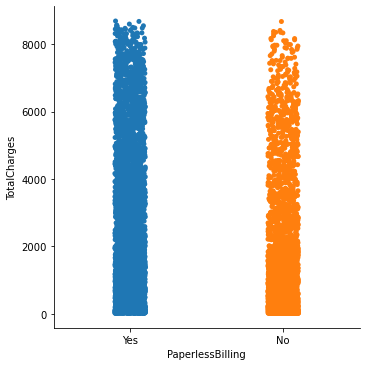

In [60]:
plt.figure(figsize=[10,6])
sns.catplot(x='PaperlessBilling',y='TotalCharges',data=df)


<Figure size 720x720 with 0 Axes>

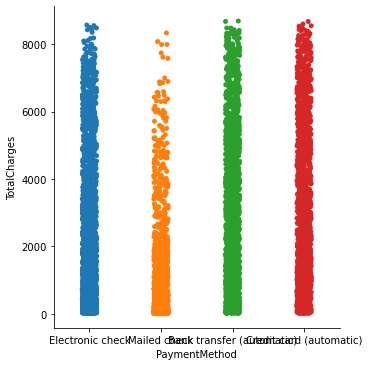

In [66]:
plt.figure(figsize=[10,10])
sns.catplot(x='PaymentMethod',y='TotalCharges',data=df)


In [ ]:
Customers using Mailed check as payment method are less.

<Figure size 720x432 with 0 Axes>

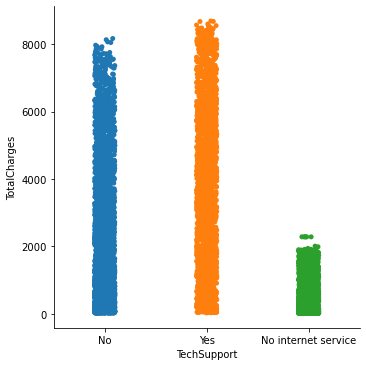

In [67]:
plt.figure(figsize=[10,6])
sns.catplot(x='TechSupport',y='TotalCharges',data=df)


<Figure size 720x432 with 0 Axes>

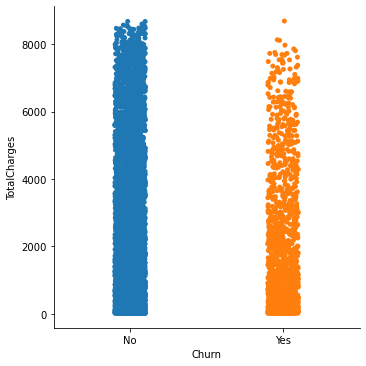

In [68]:
plt.figure(figsize=[10,6])
sns.catplot(x='Churn',y='TotalCharges',data=df)


<Figure size 720x432 with 0 Axes>

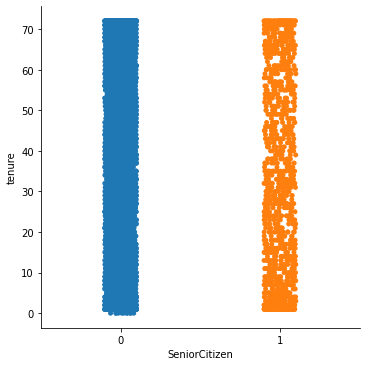

In [70]:
plt.figure(figsize=[10,6])
sns.catplot(x='SeniorCitizen',y='tenure',data=df)


In [ ]:
Seniorcitizen with 0 value tenure is more consistent.

<Figure size 720x432 with 0 Axes>

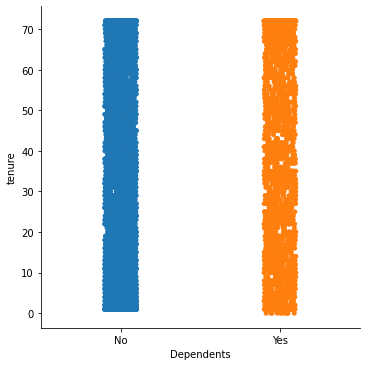

In [71]:
plt.figure(figsize=[10,6])
sns.catplot(x='Dependents',y='tenure',data=df)


<Figure size 720x432 with 0 Axes>

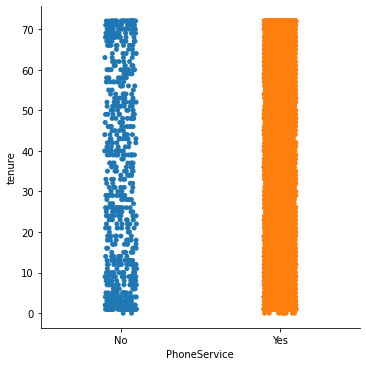

In [72]:
plt.figure(figsize=[10,6])
sns.catplot(x='PhoneService',y='tenure',data=df)


In [ ]:
Customers using PhoneService tenure is more consistent.

<Figure size 720x432 with 0 Axes>

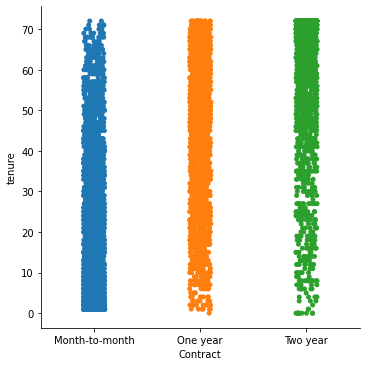

In [73]:
plt.figure(figsize=[10,6])
sns.catplot(x='Contract',y='tenure',data=df)


Customers using Month to month and 1 year contract, tenure is more consistent for them.

<Figure size 720x432 with 0 Axes>

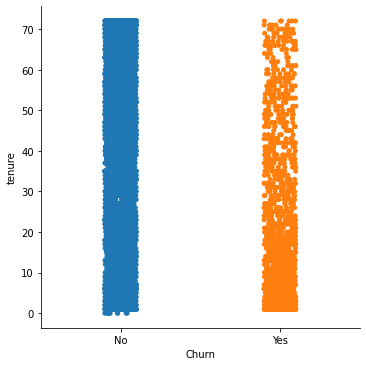

In [75]:
plt.figure(figsize=[10,6])
sns.catplot(x='Churn',y='tenure',data=df)


# Multivariate Analysis

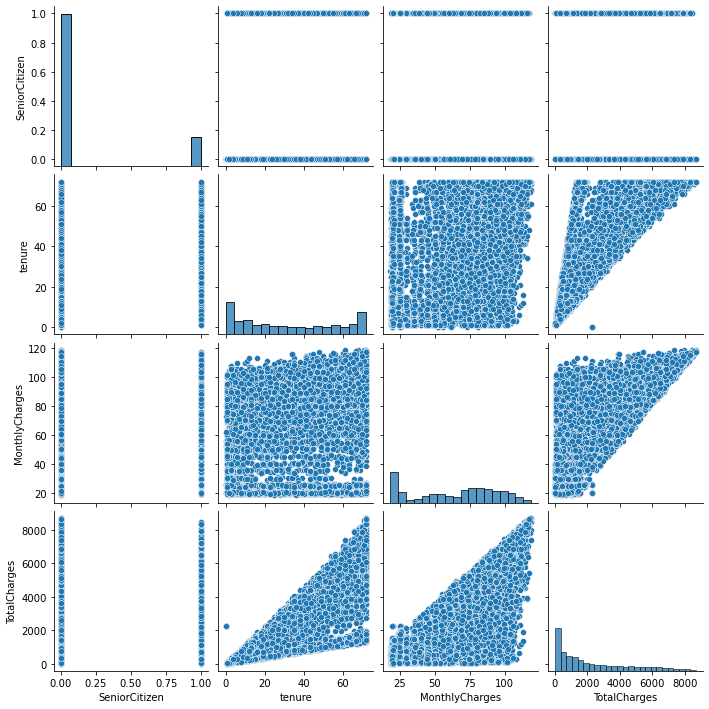

In [76]:
sns.pairplot(df)

# Encoding of Categorical column

**Since most of the columns have values 2,3 or 4,so will use OrdinalEncoder

In [134]:
from sklearn.preprocessing import OrdinalEncoder
oec= OrdinalEncoder()

In [135]:
cat_col=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in cat_col:
    df[i]=oec.fit_transform(df[i].values.reshape(-1,1))

In [79]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [80]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Correlation

<AxesSubplot:>

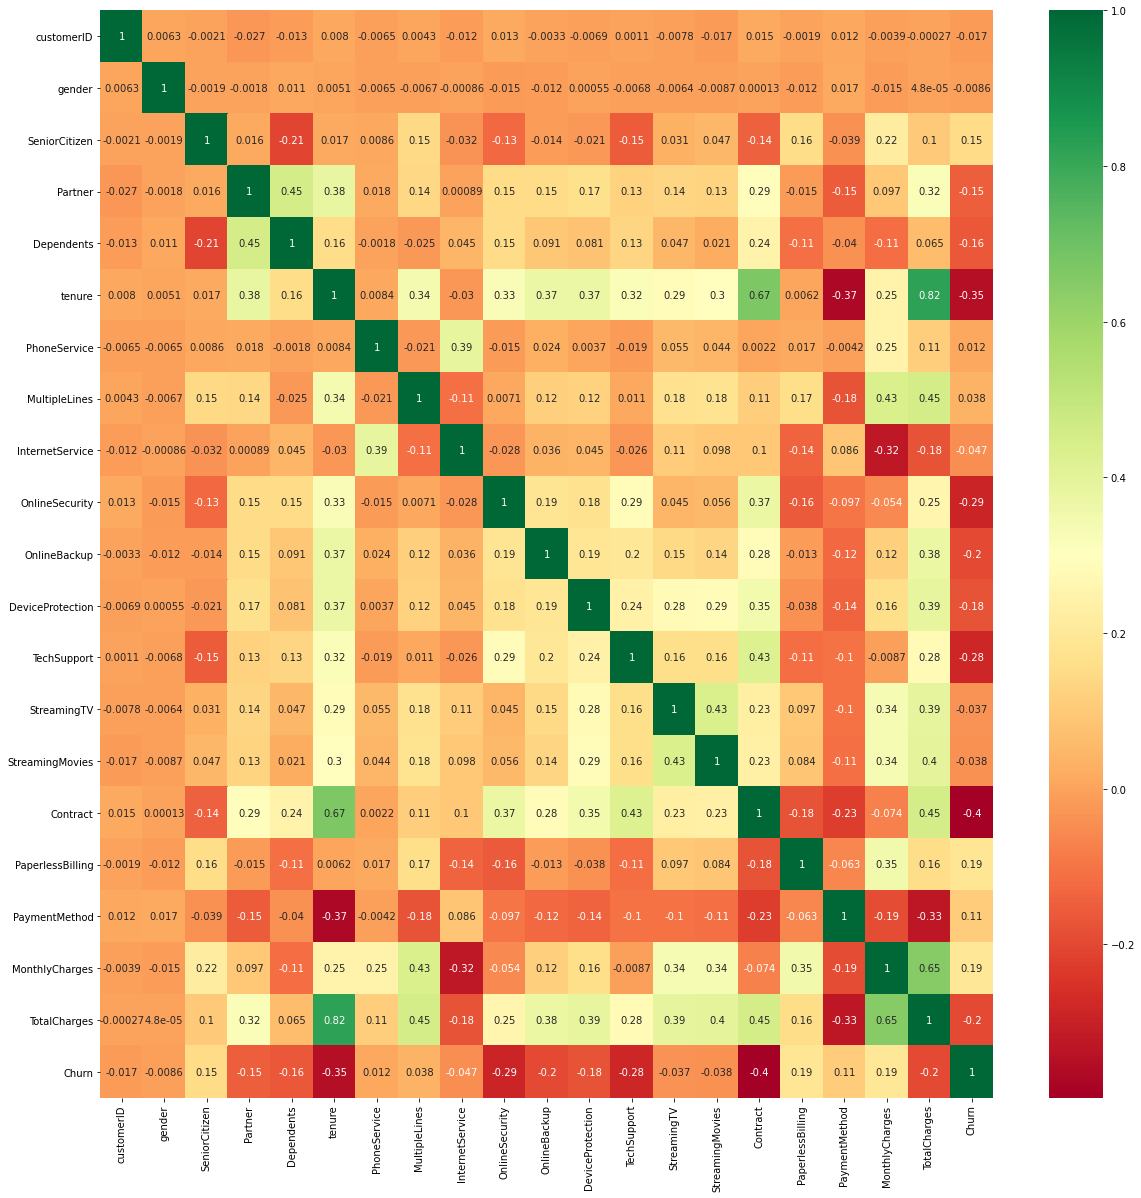

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap = 'RdYlGn')

CustomerID and gender has very weak relationship with Target column.
tenure has very strong positive relation with TotalCharges.
InrenetService,PaymentMethod and Churn have negative correlation with Target column.

Text(0.5, 1.0, 'Correlation between label and features using bar plot')

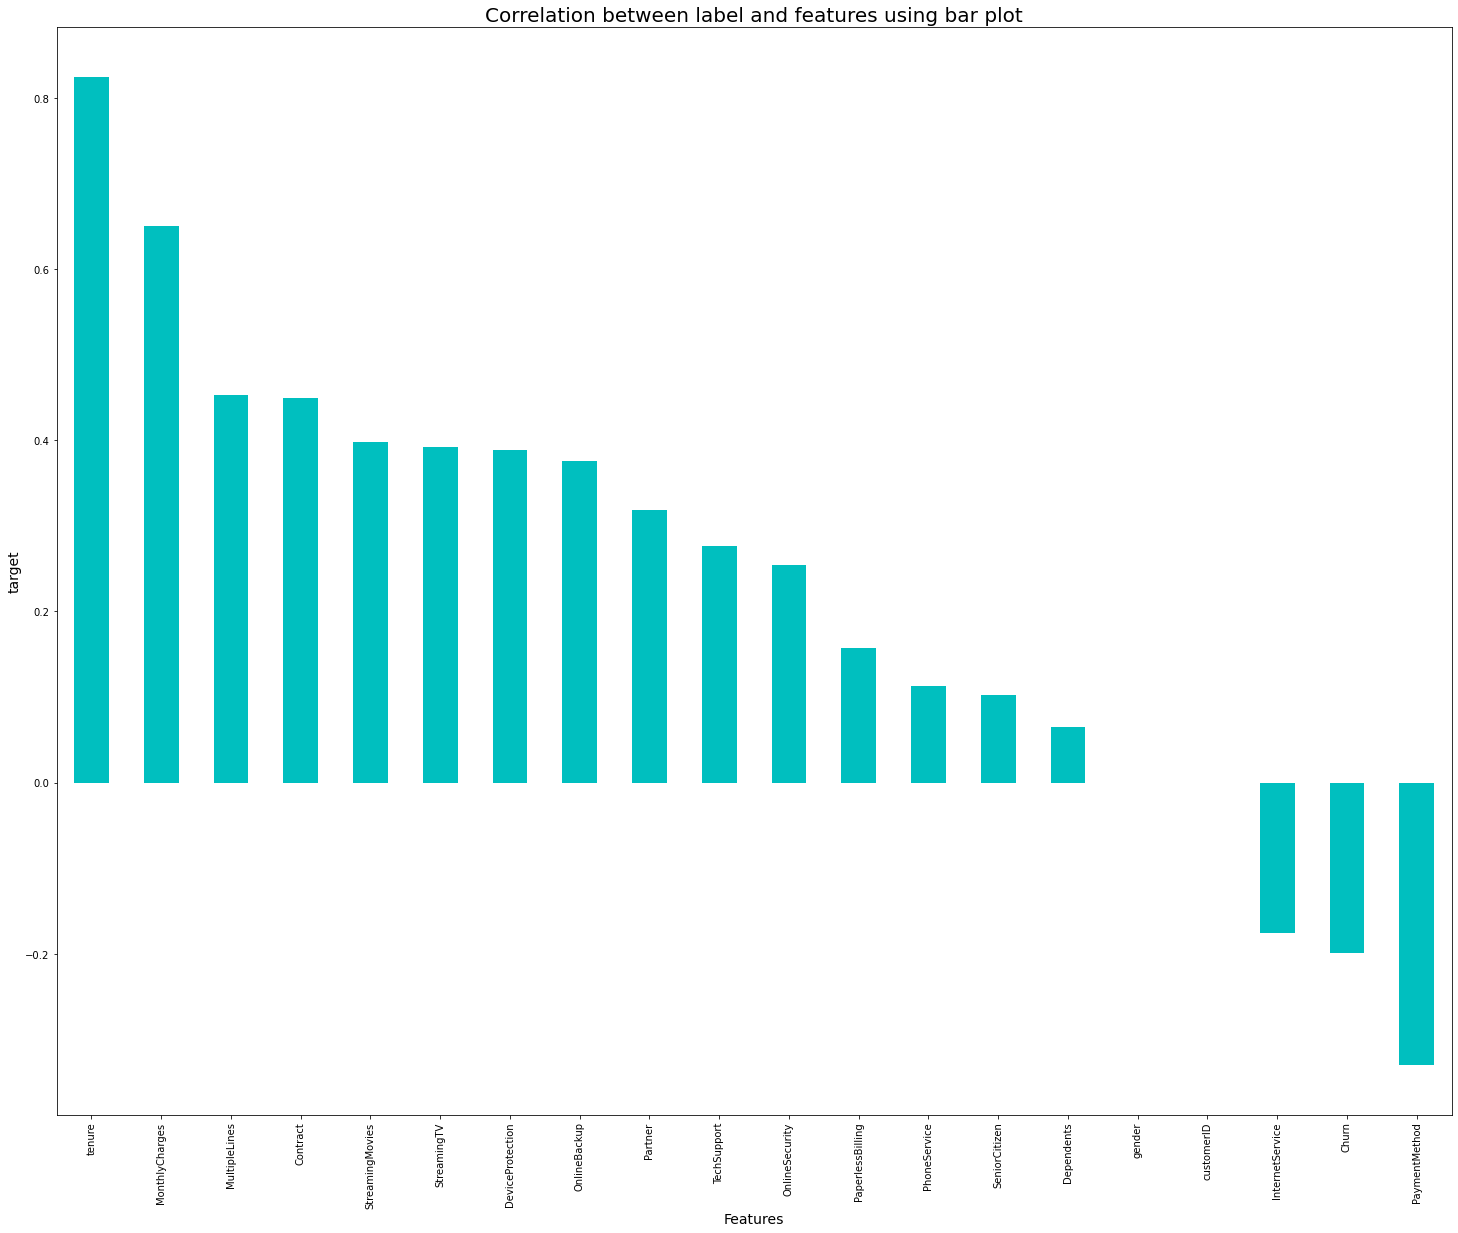

In [84]:
plt.figure(figsize=(25,20))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('Correlation between label and features using bar plot',fontsize=20)


tenure,MonthlyCharges have good positive correlation with target more than 60%.

# Skewness

In [85]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

SeniorCitizen,Dependents,PhoneService,Contract,TotalCharges,Churn showing values out of the range +/- 0.5.But except TotalCharges,all are categorical columns and TotalCharges is Target column,So will not do anything for skewness removal.

# Outliers

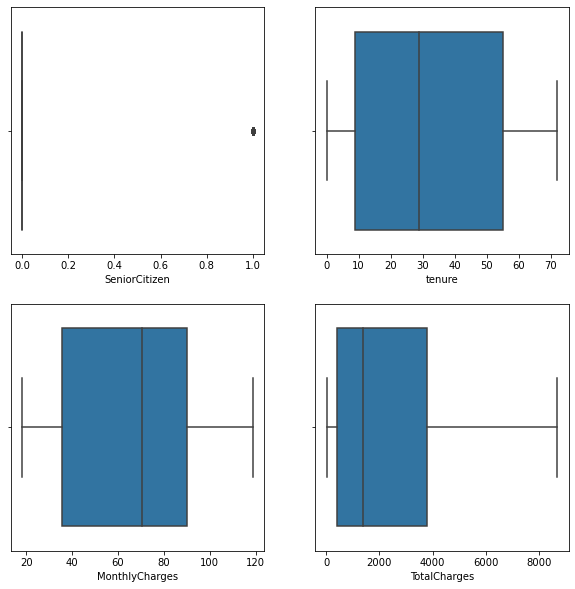

In [90]:
columns =['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(10,10))
graph =1
for i in columns:
    if graph <=4:
        ax = plt.subplot(2,2,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph +=1
plt.show()    


# Zscore

In [136]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [137]:
df_new =df[(z<3).all(axis=1)]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [138]:
Data_loss = ((7043-6361)/7043)*100

In [139]:
Data_loss

9.683373562402386

**Senior Citizen has only two values 0 and 1,and most of the values are 0,so it is becoming biased and  treating 1 as outlier.There are not any outliers present in dataset.

# Separating features and target 

In [91]:
x = df.drop('TotalCharges',axis=1)
y = df['TotalCharges']

In [92]:
x.shape,y.shape

((7043, 20), (7043,))

# Scaling data using Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.601023
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.601023
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,1.663829
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.601023
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.601023
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,-0.601023
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.601023
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,1.663829


In [114]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Finding Best Random State

In [96]:
from sklearn.ensemble import RandomForestRegressor
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    score = r2_score(y_test,pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
print("Maximum r2 score is ",maxscore,"at Random_state",maxRS)


Maximum r2 score is  0.9988655002965977 at Random_state 82


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)


In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV


# Random Forest Regressor

In [100]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr = rfr.predict(x_test)
print("R2_Score:",r2_score(y_test,predrfr))


R2_Score: 0.9988830570206632


# DecisionTree Regressor

In [101]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr = dtr.predict(x_test)
print("R2_Score Decision Tree Regressor:",r2_score(y_test,preddtr))


R2_Score Decision Tree Regressor: 0.9971085867677547


# KNeighbors Regressor

In [102]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score using KNN Regressor:",r2_score(y_test,predknn))


R2_Score using KNN Regressor: 0.8756364478713954


# GradientBoosting Regressor:

In [103]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr = gbr.predict(x_test)
print("R2_Score using Gradient Boosting Regressor:",r2_score(y_test,predgbr))


R2_Score using Gradient Boosting Regressor: 0.99819116835051


# LinearRegression

In [104]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("R2_Score using Gradient Boosting Regressor:",r2_score(y_test,predlr))


R2_Score using Gradient Boosting Regressor: 0.9075219965075724


# CrossValidation

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [108]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(dtr, x, y, cv=cv)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())


Cross Validation of DecisionTree Regression model  0.9970334633039766


In [109]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(rfr, x, y, cv=cv)
print("Cross Validation of RandomForest Regression model ",cvs.mean())


Cross Validation of RandomForest Regression model  0.9987137889019759


In [110]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(gbr, x, y, cv=cv)
print("Cross Validation of GradientBoosting Regression model ",cvs.mean())


Cross Validation of GradientBoosting Regression model  0.9980413656026135


In [111]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(knn, x, y, cv=cv)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.8618003999366509


In [112]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(lr, x, y, cv=cv)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.9010406985385344


So we can see Our model is not overfitting or underfitting.Cross Validation score is highest for RandomForest,so will do HyperParameter tuning for that.

# Plotting regplot graph for RandomForest model

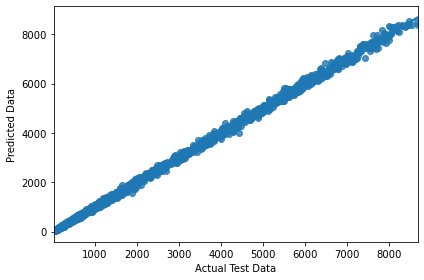

In [113]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr = rfr.predict(x_test)
sns.regplot(y_test,predrfr)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Data points are very well fit on the best fit line.

# Regularization

In [116]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 0.041100000000000005, 'max_iter': 1000, 'normalize': True}

In [ ]:
## Providing Best Parameters

In [117]:
lasso=Lasso(alpha= 0.041100000000000005, max_iter= 1000, normalize=True)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)*100

90.7572774592743

In [118]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=maxRS)
cvs = cross_val_score(lasso, x, y, cv=cv)
print("Cross Validation of Lasso Regression model ",cvs.mean())


Cross Validation of Lasso Regression model  0.901078901125001


# HyperParameter Tuning

In [119]:
rf = RandomForestRegressor()
parameters={'n_estimators' : [100,200],'criterion':['mse','mae']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'mse', 'n_estimators': 200}

In [126]:
rf = RandomForestRegressor(criterion='mse',n_estimators=200)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
score = r2_score(y_test,pred)
score


0.9988840855272637

Our model is giving almost 100 percent,Permorming extremely well.

In [123]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(rf.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,92.250000,92.218000
1,84.650000,84.626750
2,734.350000,764.612250
3,1992.200000,2029.864500
4,155.900000,153.161000
...,...,...
2108,903.600000,971.039000
2109,2283.300441,2272.295439
2110,1313.250000,1318.663750
2111,1017.350000,1001.160250


# Saving the model


In [ ]:
import pickle 
filename='Customer_Churn_prediction.pickle'
pickle.dump(rf,open(filename,'wb'))